___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [101]:

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
from pandas_datareader import data, wb

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [141]:
BAC = data.DataReader('BAC', 'yahoo','JAN-01-2006','JAN-01-2016' )
C = data.DataReader('C', 'yahoo','JAN-01-2006','JAN-01-2016' )
GS = data.DataReader('GS', 'yahoo','JAN-01-2006','JAN-01-2016' )
JPM = data.DataReader('JPM', 'yahoo','JAN-01-2006','JAN-01-2016' )
MS = data.DataReader('MS', 'yahoo','JAN-01-2006','JAN-01-2016' )
WFC = data.DataReader('WFC', 'yahoo','JAN-01-2006','JAN-01-2016' )

In [142]:
C.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,147.422630,143.622424,145.685157,145.388713,2.842986e+07,126.157798
std,178.963279,175.978481,177.553275,177.398413,2.829885e+07,148.090332
min,10.700000,9.700000,10.200000,10.200000,6.328000e+05,9.480454
25%,40.099998,38.799999,39.500000,39.400002,1.007370e+07,36.620575
50%,49.919998,48.889999,49.430000,49.389999,2.183960e+07,46.008099
75%,204.600006,190.399994,197.399994,196.899994,3.869110e+07,177.748367
max,570.000000,555.500000,566.000000,564.099976,3.772638e+08,474.080811


In [143]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [144]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis =1,
                       keys= tickers)
bank_stocks.describe()

BAC                                                       \
              High          Low         Open        Close        Volume   
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean     22.475407    21.894899    22.203417    22.174660  1.335182e+08   
std      15.403290    15.198863    15.304860    15.304887  1.278983e+08   
min       3.510000     2.530000     3.220000     3.140000  4.835400e+06   
25%      12.450000    12.130000    12.310000    12.270000  4.841140e+07   
50%      15.970000    15.600000    15.780000    15.790000  1.013807e+08   
75%      33.599998    31.750000    32.730000    32.630001  1.752131e+08   
max      55.080002    54.820000    55.040001    54.900002  1.226791e+09   

                              C                                         ...  \
         Adj Close         High          Low         Open        Close  ...   
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  ...   
mean     18.873817   147.422630   143.622424   145.685157   145.388713  ...   
std      11.671059   178.963279   175.978481   177.553275   177.398413  ...   
min       2.831128    10.700000     9.700000    10.200000    10.200000  ...   
25%      11.154500    40.099998    38.799999    39.500000    39.400002  ...   
50%      14.501741    49.919998    48.889999    49.430000    49.389999  ...   
75%      28.356405   204.600006   190.399994   197.399994   196.899994  ...   
max      43.195049   570.000000   555.500000   566.000000   564.099976  ...   

                MS                                                  WFC  \
              Open        Close        Volume    Adj Close         High   
count  2517.000000  2517.000000  2.517000e+03  2517.000000  2517.000000   
mean     36.021565    36.006198  1.758182e+07    29.055759    36.015109   
std      18.671854    18.669383  1.676122e+07    11.930004     9.929068   
min       9.190000     9.200000  1.120500e+06     7.740676     8.940000   
25%      23.799999    23.870001  8.728000e+06    20.771822    28.969999   
50%      30.389999    30.340000  1.389980e+07    26.644115    33.889999   
75%      40.110001    40.209999  2.163520e+07    35.424332    41.419998   
max      90.769997    89.300003  3.297861e+08    59.979870    58.770000   

                                                                         
               Low         Open        Close        Volume    Adj Close  
count  2517.000000  2517.000000  2517.000000  2.517000e+03  2517.000000  
mean     35.169891    35.598272    35.598323  3.295450e+07    28.370507  
std      10.105311    10.010993    10.012564  3.575351e+07     9.749719  
min       7.800000     8.650000     8.120000  2.392000e+06     6.276263  
25%      27.950001    28.410000    28.490000  1.378800e+07    21.799656  
50%      33.025002    33.400002    33.500000  2.316030e+07    25.009499  
75%      40.790001    41.060001    41.220001  3.798820e+07    34.256851  
max      58.070000    58.730000    58.520000  4.787366e+08    51.304592  

[8 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [145]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [146]:
bank_stocks.head(5)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.261963  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.288212  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.393185  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.432571  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.839397  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.762926  
2006-01-04   31.799999  31.530001  10870000.0  21.510502  
2006-01-05   31.500000  31.495001  10158000.0  21.486622  
2006-01-06   31.580000  31.680000   8403800.0  21.612835  
2006-01-09   31.674999  31.674999   5619600.0  21.609425  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [147]:
bank_stocks.xs('Close', axis =1, level= 1 ).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [148]:
returns = pd.DataFrame()

In [189]:
for tick in tickers: 
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

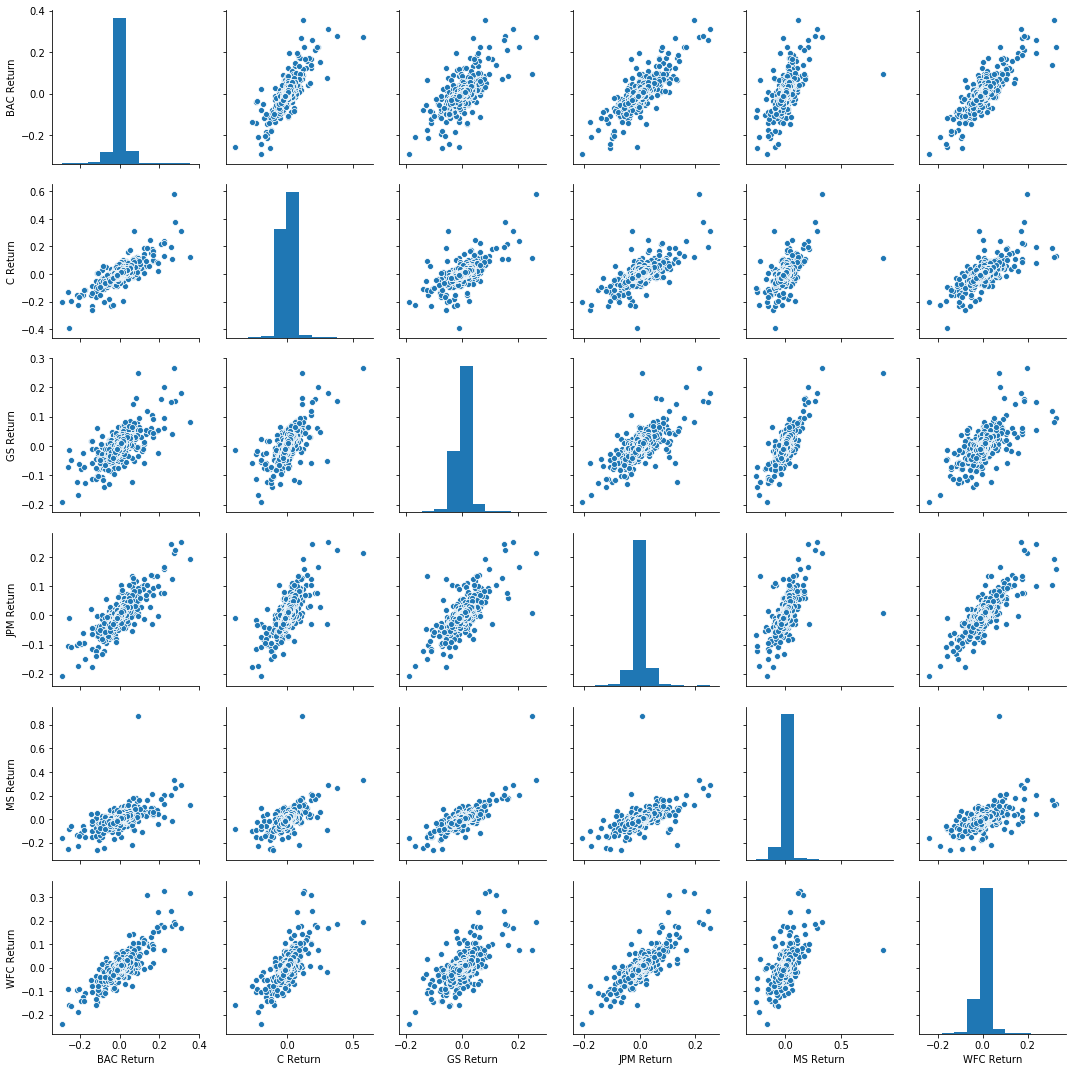

In [150]:
sns.pairplot(returns[1:])

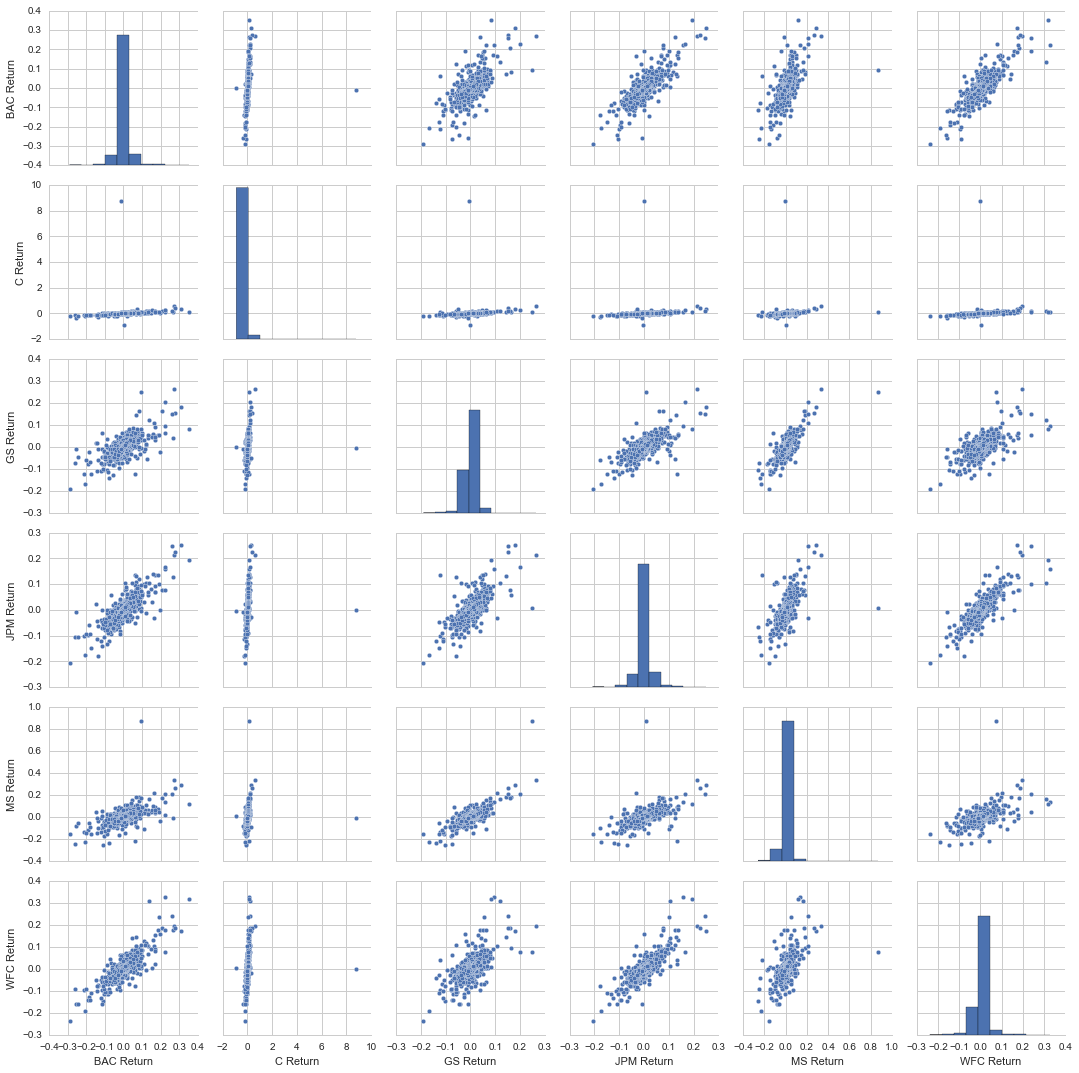

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [151]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [152]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [154]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [160]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

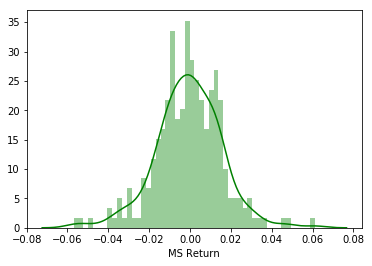

In [162]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins = 50)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



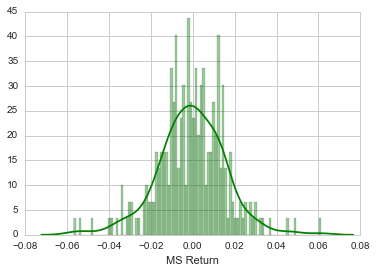

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

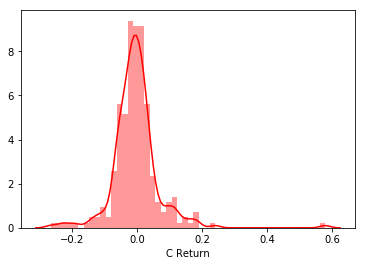

In [164]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'red', bins= 50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_offline()

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

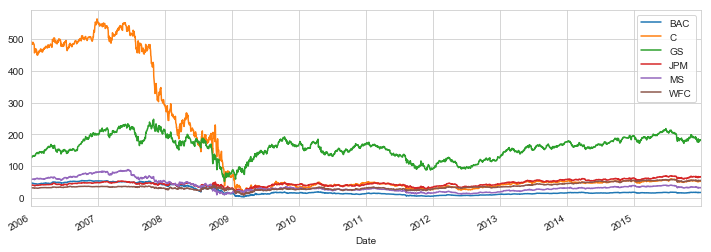

In [174]:
for tick in tickers: 
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

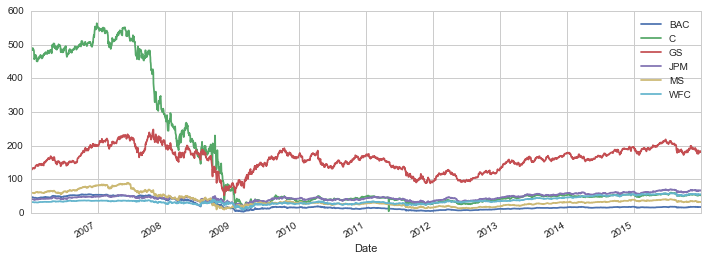

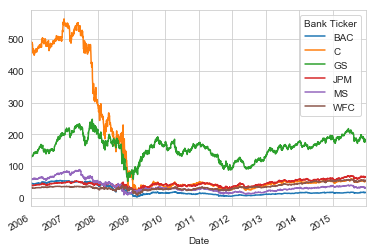

In [175]:
bank_stocks.xs(key='Close',axis=1, level='Stock Info').plot()

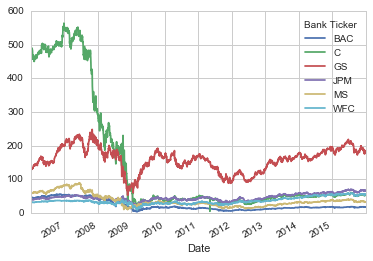

In [182]:
# bank_stocks.xs(key='Close',axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [194]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


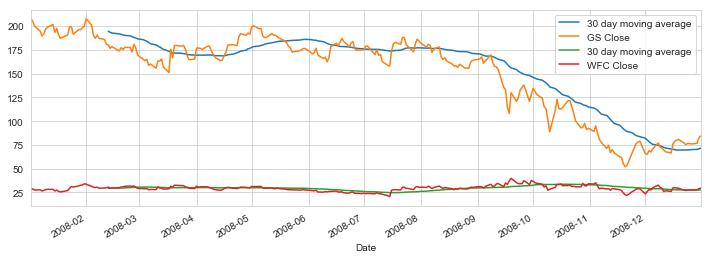

In [218]:
plt.figure(figsize = (12,4))

GS['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
GS['Close'].loc['2008-01-01':'2009-01-01'].plot(label='GS Close')
WFC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
WFC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='WFC Close')

plt.legend()

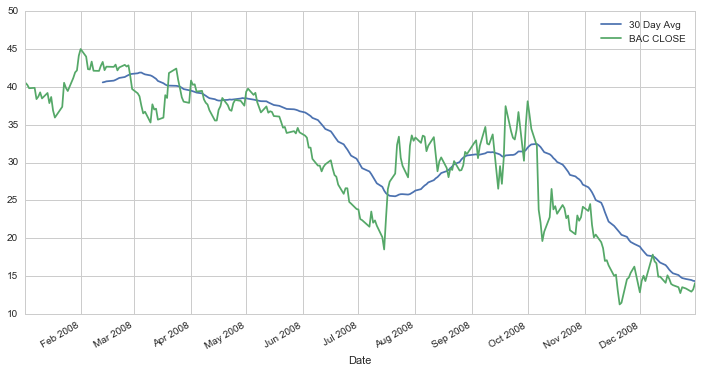

** Create a heatmap of the correlation between the stocks Close Price.**

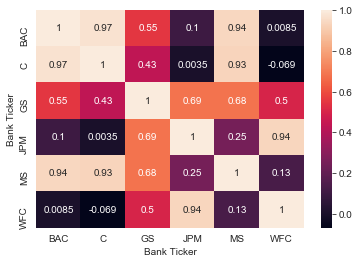

In [187]:

sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 1).corr(), annot = True)

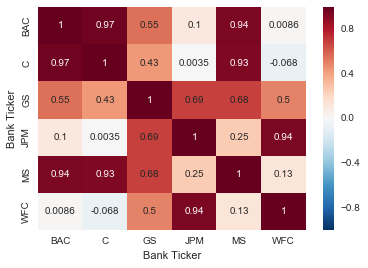

** Optional: Use seaborn's clustermap to cluster the correlations together:**

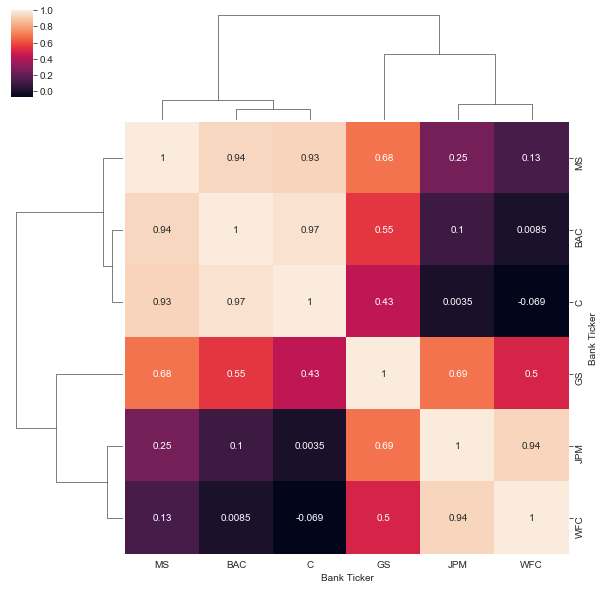

In [188]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 1).corr(), annot = True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.